In [1]:
import os
from data_load import get_data, testGenerator, saveResult
import model
import numpy as np
from keras.layers import Input
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from plot import plotting, plot_sample
%matplotlib inline

Using TensorFlow backend.


In [ ]:
from sklearn.model_selection import train_test_split

In [12]:
im_width = 128
im_height = 128
root_path = os.getcwd()
path_train = root_path+'\\input\\train\\'
path_test = root_path+'\\input\\test\\'

In [13]:
X, y = get_data(path_train, train=True)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=2018)


Getting and resizing images ... 



Done!


## Unet model version 1 

In [14]:
callbacks = [
        EarlyStopping(patience=10, verbose=1),
        # ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
        ModelCheckpoint('model-bottles_v1.h5', verbose=1, save_best_only=True, save_weights_only=True)
    ]

In [15]:
unet = model.get_unet_v1(n_filters=16, dropout=0.05, batchnorm=True)

In [16]:
results = unet.fit(X_train, y_train, batch_size=8, epochs=100, callbacks=callbacks,
                    validation_data=(X_valid, y_valid))


Train on 6 samples, validate on 2 samples
Epoch 1/100
6/6 [==============================] - 7s 1s/step - loss: 0.4896 - acc: 0.7019 - val_loss: 0.4518 - val_acc: 0.5940

Epoch 00001: val_loss improved from inf to 0.45179, saving model to model-bottles_v1.h5
Epoch 2/100
6/6 [==============================] - 2s 404ms/step - loss: 0.4430 - acc: 0.7095 - val_loss: 0.4353 - val_acc: 0.5966

Epoch 00002: val_loss improved from 0.45179 to 0.43533, saving model to model-bottles_v1.h5
Epoch 3/100
6/6 [==============================] - 3s 417ms/step - loss: 0.4048 - acc: 0.7171 - val_loss: 0.4349 - val_acc: 0.6025

Epoch 00003: val_loss improved from 0.43533 to 0.43491, saving model to model-bottles_v1.h5
Epoch 4/100
6/6 [==============================] - 3s 426ms/step - loss: 0.3806 - acc: 0.7217 - val_loss: 0.4426 - val_acc: 0.6049

Epoch 00004: val_loss did not improve from 0.43491
Epoch 5/100
6/6 [==============================] - 2s 416ms/step - loss: 0.3636 - acc: 0.7239 - val_loss: 0.45


Epoch 00040: val_loss did not improve from 0.26090
Epoch 41/100
6/6 [==============================] - 2s 413ms/step - loss: 0.2274 - acc: 0.7286 - val_loss: 0.3888 - val_acc: 0.6146

Epoch 00041: val_loss did not improve from 0.26090
Epoch 42/100
6/6 [==============================] - 3s 474ms/step - loss: 0.2260 - acc: 0.7286 - val_loss: 0.3622 - val_acc: 0.6149

Epoch 00042: val_loss did not improve from 0.26090
Epoch 43/100
6/6 [==============================] - 3s 434ms/step - loss: 0.2246 - acc: 0.7286 - val_loss: 0.3557 - val_acc: 0.6150

Epoch 00043: val_loss did not improve from 0.26090
Epoch 44/100
6/6 [==============================] - 3s 436ms/step - loss: 0.2233 - acc: 0.7286 - val_loss: 0.3369 - val_acc: 0.6155

Epoch 00044: val_loss did not improve from 0.26090
Epoch 00044: early stopping


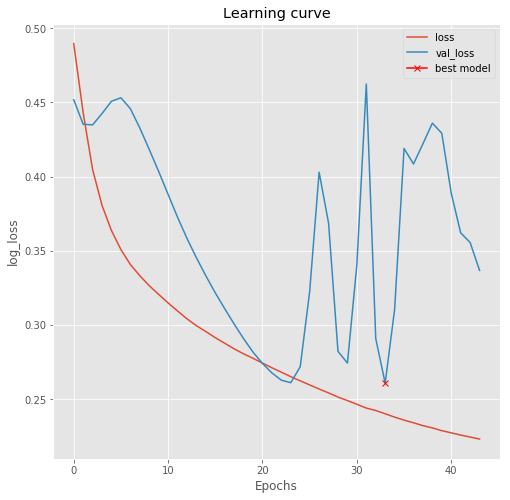

In [17]:
plotting(results)

## Unet model version 2

In [18]:
callbacks = [
        EarlyStopping(patience=10, verbose=1),
        # ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
        ModelCheckpoint('model-bottles_v2.h5', verbose=1, save_best_only=True, save_weights_only=True)
    ]

In [19]:
unet2 = model.get_unet_v2()

In [ ]:
results = unet2.fit(X_train, y_train, batch_size=8, epochs=100, callbacks=callbacks,
                    validation_data=(X_valid, y_valid))


Train on 6 samples, validate on 2 samples
Epoch 1/100
6/6 [==============================] - 16s 3s/step - loss: 0.8223 - acc: 0.0210 - val_loss: 0.6869 - val_acc: 0.5114

Epoch 00001: val_loss improved from inf to 0.68693, saving model to model-bottles_v2.h5
Epoch 2/100
6/6 [==============================] - 11s 2s/step - loss: 0.6852 - acc: 0.5890 - val_loss: 0.6777 - val_acc: 0.6124

Epoch 00002: val_loss improved from 0.68693 to 0.67766, saving model to model-bottles_v2.h5
Epoch 3/100
6/6 [==============================] - 12s 2s/step - loss: 0.6802 - acc: 0.7184 - val_loss: 0.6703 - val_acc: 0.6158

Epoch 00003: val_loss improved from 0.67766 to 0.67027, saving model to model-bottles_v2.h5
Epoch 4/100
6/6 [==============================] - 11s 2s/step - loss: 0.6674 - acc: 0.7218 - val_loss: 0.6545 - val_acc: 0.6206

Epoch 00004: val_loss improved from 0.67027 to 0.65452, saving model to model-bottles_v2.h5
Epoch 5/100
6/6 [==============================] - 11s 2s/step - loss: 0.6


Epoch 00041: val_loss did not improve from 0.21190
Epoch 42/100
6/6 [==============================] - 11s 2s/step - loss: 0.2076 - acc: 0.7287 - val_loss: 0.2151 - val_acc: 0.6217

Epoch 00042: val_loss did not improve from 0.21190
Epoch 43/100
6/6 [==============================] - 11s 2s/step - loss: 0.2069 - acc: 0.7287 - val_loss: 0.2106 - val_acc: 0.6217

Epoch 00043: val_loss improved from 0.21190 to 0.21058, saving model to model-bottles_v2.h5
Epoch 44/100
6/6 [==============================] - 11s 2s/step - loss: 0.2055 - acc: 0.7287 - val_loss: 0.2065 - val_acc: 0.6217

Epoch 00044: val_loss improved from 0.21058 to 0.20649, saving model to model-bottles_v2.h5
Epoch 45/100
6/6 [==============================] - 11s 2s/step - loss: 0.2045 - acc: 0.7287 - val_loss: 0.2065 - val_acc: 0.6217

Epoch 00045: val_loss did not improve from 0.20649
Epoch 46/100
6/6 [==============================] - 11s 2s/step - loss: 0.2038 - acc: 0.7287 - val_loss: 0.2099 - val_acc: 0.6217

Epoch 0


Epoch 00083: val_loss improved from 0.18872 to 0.18769, saving model to model-bottles_v2.h5
Epoch 84/100
6/6 [==============================] - 10s 2s/step - loss: 0.1887 - acc: 0.7287 - val_loss: 0.1885 - val_acc: 0.6217

Epoch 00084: val_loss did not improve from 0.18769
Epoch 85/100
6/6 [==============================] - 11s 2s/step - loss: 0.1881 - acc: 0.7287 - val_loss: 0.1957 - val_acc: 0.6217

Epoch 00085: val_loss did not improve from 0.18769
Epoch 86/100
6/6 [==============================] - 11s 2s/step - loss: 0.1852 - acc: 0.7287 - val_loss: 0.2026 - val_acc: 0.6217

Epoch 00086: val_loss did not improve from 0.18769
Epoch 87/100
6/6 [==============================] - 11s 2s/step - loss: 0.1886 - acc: 0.7287 - val_loss: 0.1995 - val_acc: 0.6217

Epoch 00087: val_loss did not improve from 0.18769
Epoch 88/100
6/6 [==============================] - 11s 2s/step - loss: 0.1867 - acc: 0.7287 - val_loss: 0.1933 - val_acc: 0.6217

Epoch 00088: val_loss did not improve from 0.187

In [ ]:
plotting(results)